## Исследование статистики продаж компьютерных игр по платформам

## Study of computer games sales statistics by platform

Перед нами данные по продажам компьютерных игр до 2016 года. На основе имеющихся данных постараемся сфоримровать прогноз и рекомендации на следующий (2017) год.

Before us is the data on sales of computer games until 2016. Based on the available data, we will try to formulate a forecast and recommendations for the next (2017) year.


### Открытие файла и загрузка библиотек

In [1]:
import pandas as pd
import copy
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


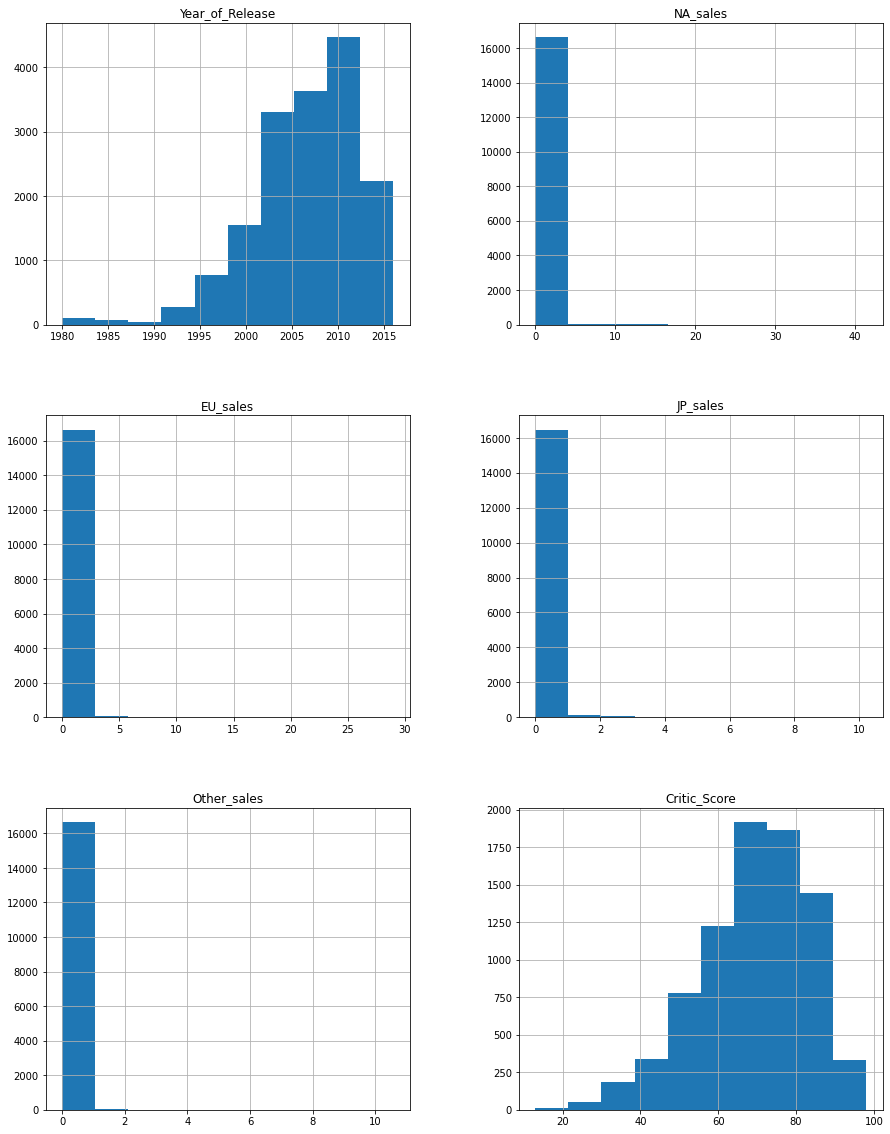

In [2]:
data = pd.read_csv('/datasets/games.csv')

data.hist(figsize=(15, 20))

data.head(10)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Предобработка данных

### Data preprocessing

In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропуски' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

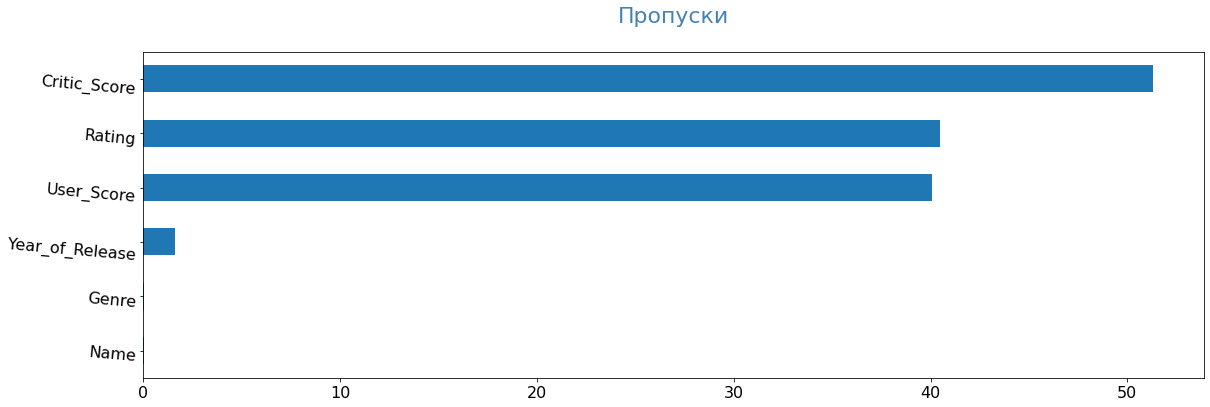

In [6]:
pass_value_barh(data)

In [7]:
# check
def isna_view (df):
    return  (
                (df.isna().mean()*100)
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns = {0:'percent_space'})
                .style.background_gradient('coolwarm').format("{:.1f}")
            )

isna_view (data)

,percent_space
Critic_Score,51.3
Rating,40.5
User_Score,40.1
Year_of_Release,1.6
Name,0.0
Genre,0.0
Platform,0.0
NA_sales,0.0
EU_sales,0.0
JP_sales,0.0


In [8]:
data.columns = data.columns.str.lower()#приводим названия столбцов к нижнему регистру

In [9]:
data['name'] = data['name'].str.lower()#приводим содержимое категориальных столбцов к нижнему регистру

In [10]:
data['platform'] = data['platform'].str.lower()

In [11]:
data['genre'] = data['genre'].str.lower()

In [12]:
data['rating'] = data['rating'].str.lower()

Считаем суммарные продажи во всех регионах и записываем их в отдельный столбец.

We count the total sales in all regions and write them down in a separate column.

In [13]:
data['summary_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [14]:
pd.pivot_table(data, index=['year_of_release'], values='summary_sales', aggfunc='sum')

,summary_sales
year_of_release,
1980.0,11.38
1981.0,35.68
1982.0,28.88
1983.0,16.80
1984.0,50.35
1985.0,53.95
1986.0,37.08
1987.0,21.70
1988.0,47.21


In [15]:
pd.pivot_table(data, index=['name'], values='summary_sales', aggfunc='sum')

,summary_sales
name,
beyblade burst,0.03
fire emblem fates,1.67
frozen: olaf's quest,1.10
haikyu!! cross team match!,0.04
tales of xillia 2,0.84
...,...
zumba fitness rush,0.18
zumba fitness: world party,0.47
zwei!!,0.02


In [16]:
data = data.dropna(subset=['year_of_release', 'name'])

Число пропусков в данных столбцах небольшое, поэтому можем просто удалить данные строки во избежание ошибок при смене типа данных. Пропуски в столбцах critic_score и user_score не заполняем, чтобы не исказить будущие статистики. В этих столбцах нельзя выявить средние или медианные закономерности по году или жанру. Каждая игра получается индивидуальной и оценка критиков, и пользователей - субъективное мнение об игре конкретного года, жанра, платформы, студии разработчика, издателя, рекламы и репутации о серии игр.


The number of gaps in these columns is small, so we can simply delete the row data to avoid errors when changing the data type. We do not fill in the gaps in the critic_score and user_score columns so as not to distort future statistics. These columns do not reveal mean or median patterns by year or genre. Each game is obtained individually and the assessment of critics and users - a subjective opinion about the game of a particular year, genre, platform, developer's studio, publisher, advertising and reputation for a series of games.

In [17]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 
data['year_of_release'] = data['year_of_release'].astype('int')

Заменяем типы данных столбцов. Строковый тип в user_score и тип float в year_of_release могут привести к логическим ошибкам при расчетах.

Replacing column data types. The string type in user_score and the float type in year_of_release can lead to logical errors in the calculations.

In [18]:
data['summary_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Считаем суммарные продажи во всех регионах и записываем их в отдельный столбец.

We count the total sales in all regions and write them down in a separate column.

In [19]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  summary_sales    16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [20]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Восстановим пропущенные значения рейтинга ESRB. Определим самые популярные оценки для жанра и составим словарь.

Let's restore the missing values of the ESRB rating. Let's determine the most popular ratings for the genre and compile a dictionary.

In [21]:
genre_list = data['genre'].unique()
genre_dict = {}
for genre in genre_list:
    print('Популярные оценки для жанра ', genre)
    rating_value_counts = data[data['genre'] == genre]['rating'].value_counts()
    print(rating_value_counts)
    genre_dict[genre] = rating_value_counts.index[0]
    
genre_dict

Популярные оценки для жанра  sports
e       1162
t        195
e10+     105
m         16
Name: rating, dtype: int64
Популярные оценки для жанра  platform
e       354
e10+    141
t        63
m         3
Name: rating, dtype: int64
Популярные оценки для жанра  racing
e       576
t       167
e10+     95
m        18
Name: rating, dtype: int64
Популярные оценки для жанра  role-playing
t       415
m       161
e10+    111
e        83
Name: rating, dtype: int64
Популярные оценки для жанра  puzzle
e       284
e10+     42
t        10
Name: rating, dtype: int64
Популярные оценки для жанра  misc
e       449
t       228
e10+    166
m        13
ec        5
k-a       1
Name: rating, dtype: int64
Популярные оценки для жанра  shooter
m       553
t       340
e10+     56
e        47
Name: rating, dtype: int64
Популярные оценки для жанра  simulation
e       321
t       186
e10+     47
m         5
Name: rating, dtype: int64
Популярные оценки для жанра  action
t       670
m       596
e10+    468
e       410
e

{'sports': 'e',
 'platform': 'e',
 'racing': 'e',
 'role-playing': 't',
 'puzzle': 'e',
 'misc': 'e',
 'shooter': 'm',
 'simulation': 'e',
 'action': 't',
 'fighting': 't',
 'adventure': 'e',
 'strategy': 't'}

In [22]:
data['rating'] = data['rating'].fillna('NR')

def fill_rating(row):
    if row[10] == 'NR':
        row[10] = genre_dict[row[3]]
    return row

data = data.apply(fill_rating, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  summary_sales    16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [23]:
data['rating'].value_counts()#проверяем наличие пропусков

e       7679
t       5523
m       1836
e10+    1393
ec         8
k-a        3
ao         1
rp         1
Name: rating, dtype: int64

Удаление полных дупликатов.

Removing full duplicates.

In [85]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  summary_sales    16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Исследовательский анализ данных

### Exploratory data analysis

In [24]:
year_of_release_pivot_table = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
year_of_release_pivot_table.columns = ['games_count']
year_of_release_pivot_table

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<AxesSubplot:xlabel='year_of_release'>

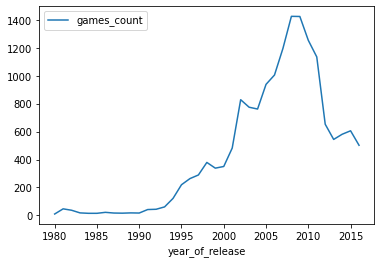

In [25]:
year_of_release_pivot_table.plot()

Посмотрим, сколько игр выпускалось в разные годы.
С 1980 годов по 1993 мы видим относительное малое чило выпускаемых игр, что наверняка связано с техническими ограничениями на тот момент и распространением компьютеров как таковых.
Далее, в 2002-2003 годах начался "бум" по выпуску компьютерных игр. Пик наблюдаемого роста пришелся на 2008-2009 годы.
После этого периода наметился явный спад на число выпускаемых игр. Это можно связать с возрастающей требовательностью к сложности разрабатываемых игр и общей монополизации рынка, однако это требует отдельного исследования.

Let's see how many games were released in different years.
From the 1980s to 1993, we see a relatively small number of games released, which is probably due to technical limitations at that time and the spread of computers as such.
Further, in 2002-2003, a "boom" began in the release of computer games. The peak of observed growth occurred in 2008-2009.
After this period, there has been a clear decline in the number of released games. This can be associated with the increasing demands on the complexity of the developed games and the general monopolization of the market, but this requires a separate study.

In [26]:
platform_sales_pivot_table = pd.pivot_table(data, index=['platform'], values='summary_sales', aggfunc='sum')
platform_sales_pivot_table = platform_sales_pivot_table.sort_values('summary_sales',ascending=False)
platform_sales_pivot_table

,summary_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


In [27]:
best_sales_platform = list(platform_sales_pivot_table.index[:5])#самые популярные платформы
best_sales_platform

['ps2', 'x360', 'ps3', 'wii', 'ds']

In [28]:
for platform in best_sales_platform:
    print('Платформа ',platform)
    platform_sales_pivot_table = pd.pivot_table(data.query('platform == @platform'), 
                                                index=['platform','year_of_release'], 
                                                values='summary_sales', aggfunc='sum')
    print(platform_sales_pivot_table)
    print()

Платформа  ps2
                          summary_sales
platform year_of_release               
ps2      2000                     39.17
         2001                    166.43
         2002                    205.38
         2003                    184.31
         2004                    211.81
         2005                    160.66
         2006                    103.42
         2007                     75.99
         2008                     53.90
         2009                     26.40
         2010                      5.64
         2011                      0.45

Платформа  x360
                          summary_sales
platform year_of_release               
x360     2005                      8.25
         2006                     51.62
         2007                     95.41
         2008                    135.26
         2009                    120.29
         2010                    170.03
         2011                    143.84
         2012                     99.74
        

In [29]:
print('Платформа ','ps4')
platform_sales_pivot_table = pd.pivot_table(data.query('platform == "ps4"'), index=['platform','year_of_release'], values='summary_sales', aggfunc='sum')
print(platform_sales_pivot_table)
print()

Платформа  ps4
                          summary_sales
platform year_of_release               
ps4      2013                     25.99
         2014                    100.00
         2015                    118.90
         2016                     69.25



Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и выстроим распределение по годам. 
Для платформ, которые пользуются популярностью, срок использования равен примерно 10 лет. Можно проследить, как менялись поколения на примере игровых приставок PlayStation:

PS 1994-2003
PS2 2000-2011
PS3 2006-2016
PS4 2013-по сегодняшний день

Получается примерно каждые 5-7 лет компания Sony выпускает новую платформу с лучшими техническими параметрами, а игры на предыдущей платформе еще существуют на рынке 3 года.

________________________________________________________________________________________________________________________________

Let's see how sales changed by platform. Let's choose the platforms with the highest total sales and build the distribution by years.
For platforms that are popular, the period of use is approximately 10 years. You can trace how generations have changed on the example of PlayStation game consoles:

PS 1994-2003
PS2 2000-2011
PS3 2006-2016
PS4 2013-to date

It turns out approximately every 5-7 years, Sony releases a new platform with the best technical parameters, and games on the previous platform still exist on the market for 3 years.

In [30]:
actual_data_games_sales = data.query('year_of_release >= 2014')
actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  summary_sales    1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


In [31]:
actual_data_games_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,m,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,t,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,m,7.98


Возьмем данные за соответствующий актуальный период. Актуальным периодом, согласно предыдущему анализу, можно считать с 2014 по 2016 год, так как индустрия компьютерных игр относится к быстро развивающимся, для анализа наиболее современных трендов берем период, не превышающий 3-х лет.

Let's take the data for the corresponding actual period. The current period, according to the previous analysis, can be considered from 2014 to 2016, since the computer games industry is one of the fastest growing, to analyze the most modern trends, we take a period not exceeding 3 years.

In [32]:
best_sales_platform = pd.pivot_table(actual_data_games_sales, index=['platform','year_of_release'], 
                                     values='summary_sales', aggfunc = 'sum')
best_sales_platform

summary_sales
platform year_of_release               
3ds      2014                     43.76
         2015                     27.78
         2016                     15.14
pc       2014                     13.28
         2015                      8.52
         2016                      5.25
ps3      2014                     47.76
         2015                     16.82
         2016                      3.60
ps4      2014                    100.00
         2015                    118.90
         2016                     69.25
psp      2014                      0.24
         2015                      0.12
psv      2014                     11.90
         2015                      6.25
         2016                      4.25
wii      2014                      3.75
         2015                      1.14
         2016                      0.18
wiiu     2014                     22.03
         2015                     16.35
         2016                      4.60
x360     2014                     34.74
         2015                     11.96
         2016                      1.52
xone     2014                     54.07
         2015                     60.14
         2016                     26.15

Определим самые прибыльные платформы за актуальный период.

Let's determine the most profitable platforms for the current period.

In [33]:
best_sales_platform = pd.pivot_table(actual_data_games_sales, index='platform', 
                                     values='summary_sales', aggfunc = 'sum')
best_sales_platform.sort_values('summary_sales', ascending=False)

,summary_sales
platform,
ps4,288.15
xone,140.36
3ds,86.68
ps3,68.18
x360,48.22
wiiu,42.98
pc,27.05
psv,22.40
wii,5.07


Топ 5 платформ по миру: PS4, PS3, XOne, X360 и 3DS. Рост продаж наблюдается у PS4 и XOne в период до 2016 года, в 2016 можно отметить спад продаж по всем платформам. 

Top 5 platforms worldwide: PS4, PS3, XOne, X360 and 3DS. Sales growth is observed for PS4 and XOne in the period up to 2016, in 2016 sales decline across all platforms can be noted.

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: summary_sales, dtype: float64

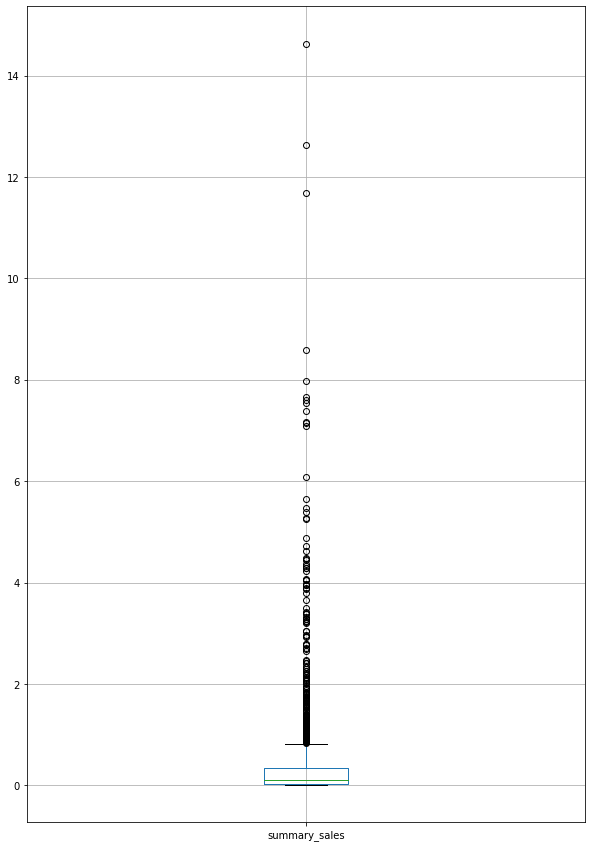

In [34]:
actual_data_games_sales.boxplot(column = 'summary_sales', figsize = (10, 15))
actual_data_games_sales['summary_sales'].describe()

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: summary_sales, dtype: float64

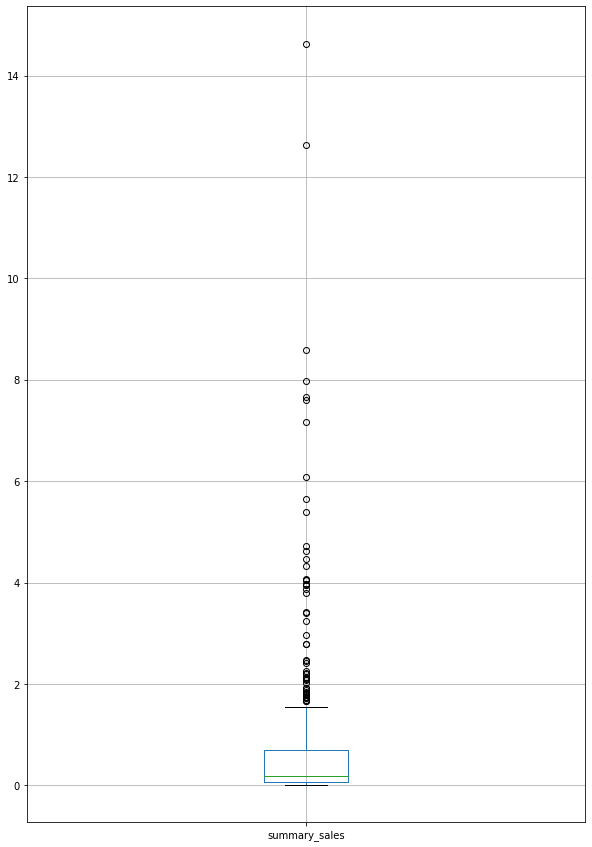

In [35]:
PS4_actual_data_games_sales = actual_data_games_sales.query('platform =="ps4"')
PS4_actual_data_games_sales.boxplot(column = 'summary_sales', figsize = (10, 15))
PS4_actual_data_games_sales['summary_sales'].describe()

count    219.000000
mean       0.311324
std        0.633059
min        0.010000
25%        0.040000
50%        0.110000
75%        0.325000
max        5.270000
Name: summary_sales, dtype: float64

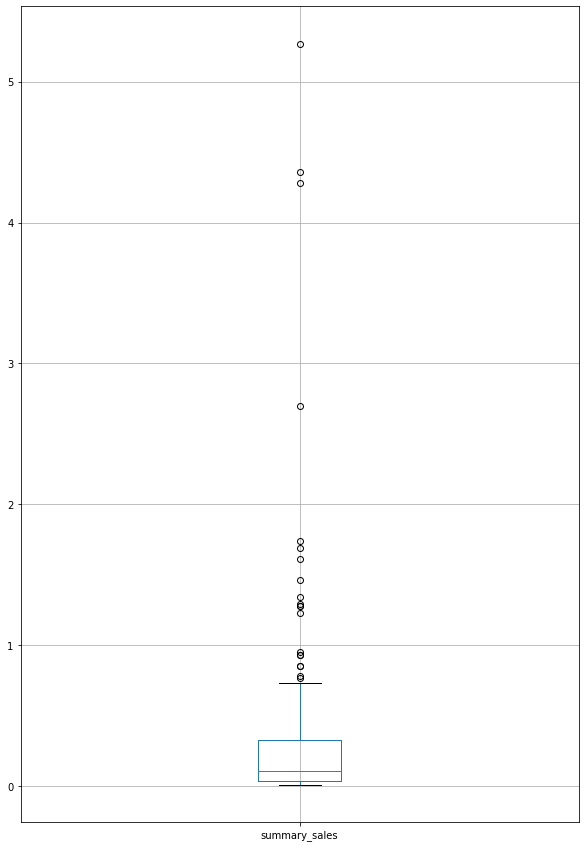

In [36]:
PS3_actual_data_games_sales = actual_data_games_sales.query('platform =="ps3"')
PS3_actual_data_games_sales.boxplot(column = 'summary_sales', figsize = (10, 15))
PS3_actual_data_games_sales['summary_sales'].describe()

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: summary_sales, dtype: float64

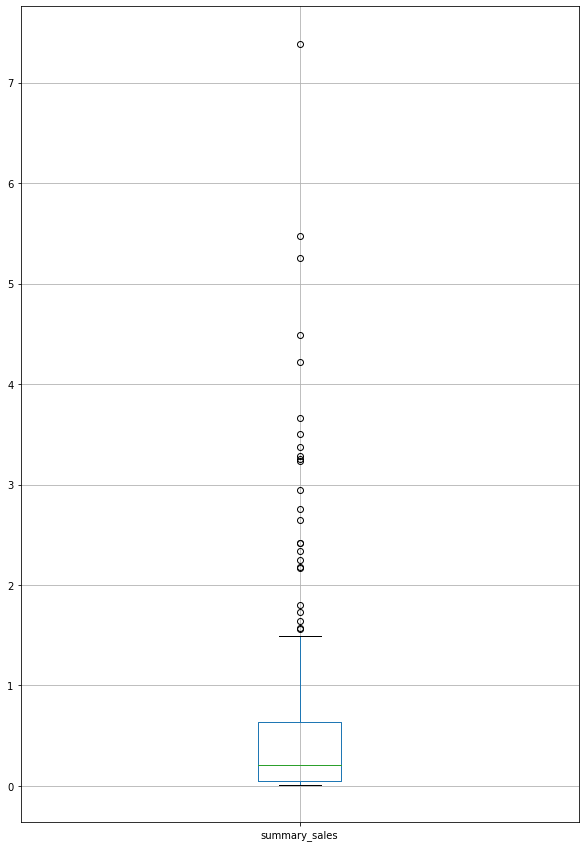

In [37]:
XOne_actual_data_games_sales = actual_data_games_sales.query('platform =="xone"')
XOne_actual_data_games_sales.boxplot(column = 'summary_sales', figsize = (10, 15))
XOne_actual_data_games_sales['summary_sales'].describe()

count    111.000000
mean       0.434414
std        0.628967
min        0.010000
25%        0.070000
50%        0.180000
75%        0.505000
max        4.280000
Name: summary_sales, dtype: float64

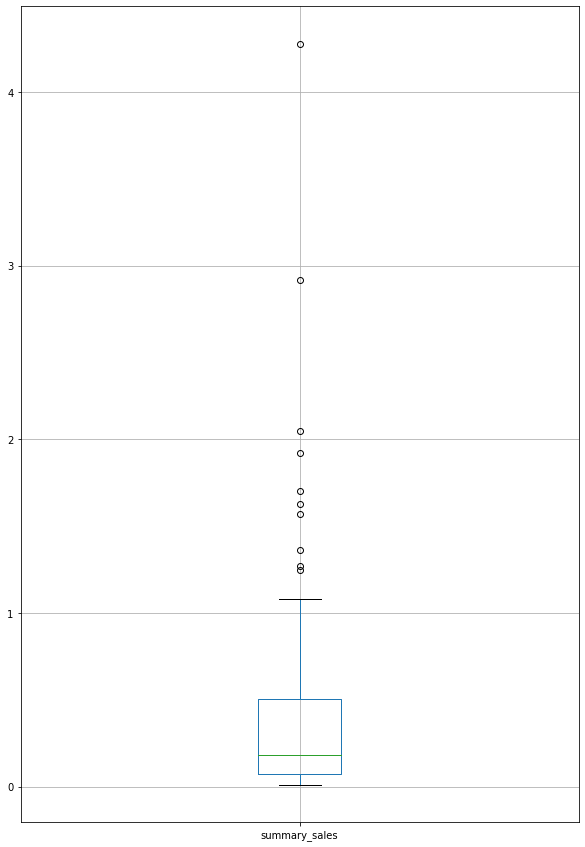

In [38]:
X360_actual_data_games_sales = actual_data_games_sales.query('platform =="x360"')
X360_actual_data_games_sales.boxplot(column = 'summary_sales', figsize = (10, 15))
X360_actual_data_games_sales['summary_sales'].describe()

count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: summary_sales, dtype: float64

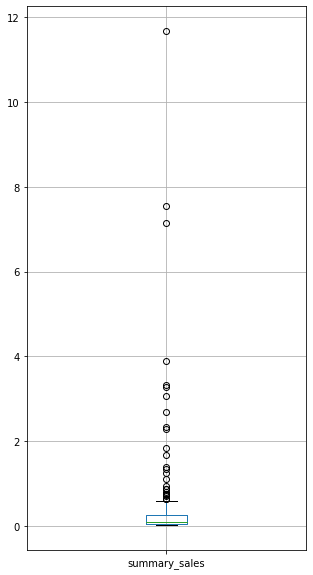

In [39]:
_3DS_actual_data_games_sales = actual_data_games_sales.query('platform =="3ds"')
_3DS_actual_data_games_sales.boxplot(column = 'summary_sales', figsize = (5, 10))
_3DS_actual_data_games_sales['summary_sales'].describe()

In [40]:
# check
import matplotlib.pyplot as plt

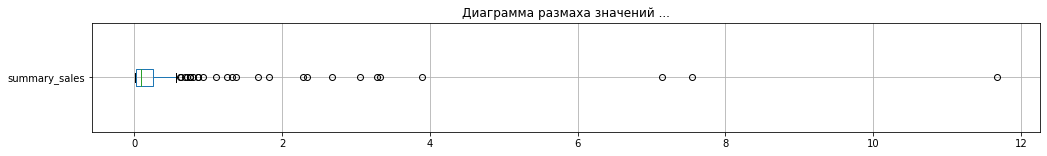

In [41]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = _3DS_actual_data_games_sales.boxplot(column = 'summary_sales', figsize = (10, 15), vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений ...');


(0.0, 4.0)

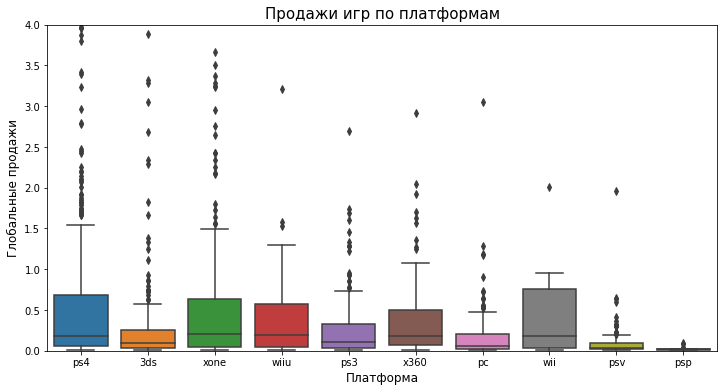

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(data=actual_data_games_sales, x='platform', y='summary_sales')
plt.title('Продажи игр по платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0,4)

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
Можно наблюдать большую разницу в уровне продаж. Существуют "выбросы" - крайне популярные игры, которые продаются годами и дают много прибыли. И при этом много игр, которые не смогли преодолеть порог в 400 тыс. долларов за выбранный период.

Период 2014-2016 год

Средняя выручка на игру по миру: 488 тыс. дол. 3/4 игр заработали до 400 тыс. Рекорд 21 млн.
Средняя выручка на игру по платформе PS4: 801 тыс. 3/4 игр заработали до 730 тыс. Рекорд 14,6 млн.
Средняя выручка на игру по платформе PS3: 526 тыс. 3/4 игр заработали до 510 тыс. Рекорд 21 млн.
Средняя выручка на игру по платформе XOne: 645 тыс. 3/4 игр заработали до 685 тыс. Рекорд 7,4 млн.
Средняя выручка на игру по платформе X360: 735 тыс. 3/4 игр заработали до 795 тыс. Рекорд 16,3 млн.
Средняя выручка на игру по платформе 3DS: 472 тыс. 3/4 игр заработали до 280 тыс. Рекорд 14,6 млн.

Исходя из графиков видно, что медиана протекает у всех по разному. Больше всех продаж у X360, затем PS4, после PS3, WII и 3DS на последнем месте.

________________________________________________________________________________________________________________________________

Let's plot a "box with a mustache" graph of global game sales by platform.
You can see a big difference in the level of sales. There are "outliers" - extremely popular games that have been sold for years and make a lot of profit. And at the same time, there are many games that could not overcome the threshold of 400 thousand dollars for the selected period.

Period 2014-2016

Average revenue per game worldwide: $488,000 3/4 of games earned up to 400K. Record 21M
PS4 platform average revenue per game: 801K 3/4 games earned up to 730K Record 14.6M
PS3 platform average revenue per game: 526K 3/4 games earned up to 510K Record 21M
Average revenue per game on the XOne platform: 645K 3/4 games earned up to 685K Record 7.4M
Average revenue per game X360 platform: 735K 3/4 games earned up to 795K Record 16.3M
Average revenue per game on the 3DS platform: 472K 3/4 games earned up to 280K Record 14.6M

Based on the graphs, it can be seen that the median proceeds differently for everyone. X360 has the highest sales, followed by PS4, followed by PS3, WII and 3DS in last place.

In [43]:
XOne_sales_crit_and_user_ratings = XOne_actual_data_games_sales.loc[:,['summary_sales', 'critic_score', 'user_score']]
XOne_sales_crit_and_user_ratings.head()

,summary_sales,critic_score,user_score
99,7.39,NaN,NaN
165,5.47,97.0,7.9
179,5.26,81.0,5.4
242,4.49,84.0,6.4
270,4.22,88.0,6.2


In [44]:
XOne_sales_crit_and_user_ratings.corr()

,summary_sales,critic_score,user_score
summary_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


array([[<AxesSubplot:xlabel='summary_sales', ylabel='summary_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='summary_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='summary_sales'>],
       [<AxesSubplot:xlabel='summary_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='summary_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

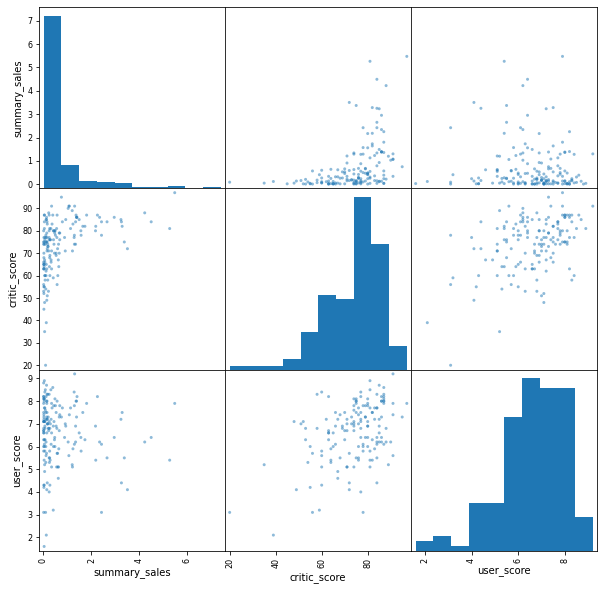

In [45]:
pd.plotting.scatter_matrix(XOne_sales_crit_and_user_ratings, figsize=(10, 10))

На примере платформы XOne посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Можно отметить, что существует есть прямая, хоть и не сильная, корреляция между прибылью и рейтингом критиков. По игрокам можно наблюдать обратную корреляцию, данный факт требует дополнительного исследования в дальнейшем.
Важно заметить, что на мнение игроков влияет рейтинг. То есть, чем выше ценит игру критик, тем выше оценит ее игрок.

Using the XOne platform as an example, let's see how the reviews of users and critics affect sales within one popular platform. It can be noted that there is a direct, though not strong, correlation between profit and critical ratings. An inverse correlation can be observed for players, this fact requires additional research in the future.
It is important to note that the opinion of the players is affected by the rating. That is, the higher the critic appreciates the game, the higher the player will appreciate it.

In [46]:
PS3_sales_crit_and_user_ratings = PS3_actual_data_games_sales.loc[:,['summary_sales', 'critic_score', 'user_score']]
PS3_sales_crit_and_user_ratings.head()

,summary_sales,critic_score,user_score
180,5.27,NaN,NaN
255,4.36,NaN,4.8
264,4.28,NaN,4.5
552,2.70,NaN,3.2
1021,1.74,NaN,5.1


In [47]:
PS3_sales_crit_and_user_ratings.corr()

,summary_sales,critic_score,user_score
summary_sales,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


array([[<AxesSubplot:xlabel='summary_sales', ylabel='summary_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='summary_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='summary_sales'>],
       [<AxesSubplot:xlabel='summary_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='summary_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

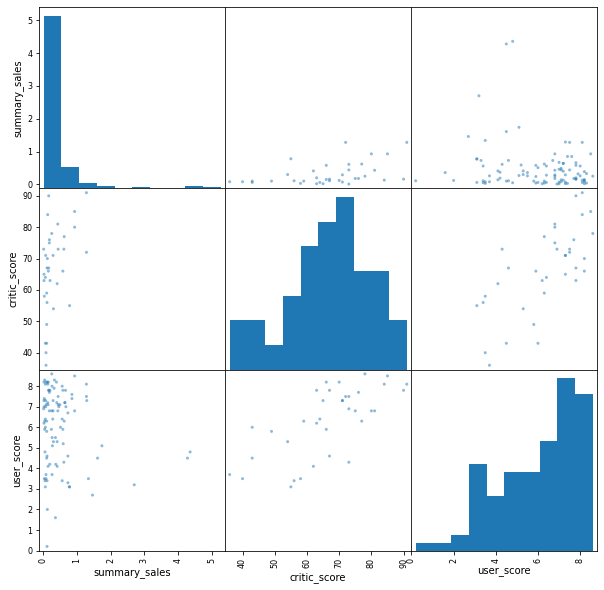

In [48]:
pd.plotting.scatter_matrix(PS3_sales_crit_and_user_ratings, figsize=(10, 10))

In [49]:
PS4_sales_crit_and_user_ratings = PS4_actual_data_games_sales.loc[:,['summary_sales', 'critic_score', 'user_score']]
PS4_sales_crit_and_user_ratings.head()

,summary_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7


In [50]:
PS4_sales_crit_and_user_ratings.corr()

,summary_sales,critic_score,user_score
summary_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


array([[<AxesSubplot:xlabel='summary_sales', ylabel='summary_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='summary_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='summary_sales'>],
       [<AxesSubplot:xlabel='summary_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='summary_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

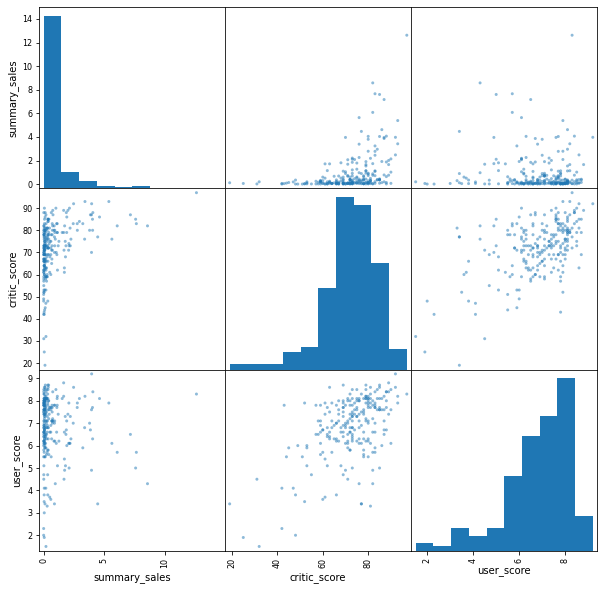

In [51]:
pd.plotting.scatter_matrix(PS4_sales_crit_and_user_ratings, figsize=(10, 10))

In [52]:
X360_sales_crit_and_user_ratings = X360_actual_data_games_sales.loc[:,['summary_sales', 'critic_score', 'user_score']]
X360_sales_crit_and_user_ratings.head()

,summary_sales,critic_score,user_score
263,4.28,NaN,4.9
494,2.92,NaN,4.2
829,2.05,NaN,5.5
898,1.92,NaN,4.7
1049,1.70,NaN,NaN


In [53]:
X360_sales_crit_and_user_ratings.corr()

,summary_sales,critic_score,user_score
summary_sales,1.000000,0.525723,-0.138445
critic_score,0.525723,1.000000,0.625309
user_score,-0.138445,0.625309,1.000000


array([[<AxesSubplot:xlabel='summary_sales', ylabel='summary_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='summary_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='summary_sales'>],
       [<AxesSubplot:xlabel='summary_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='summary_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

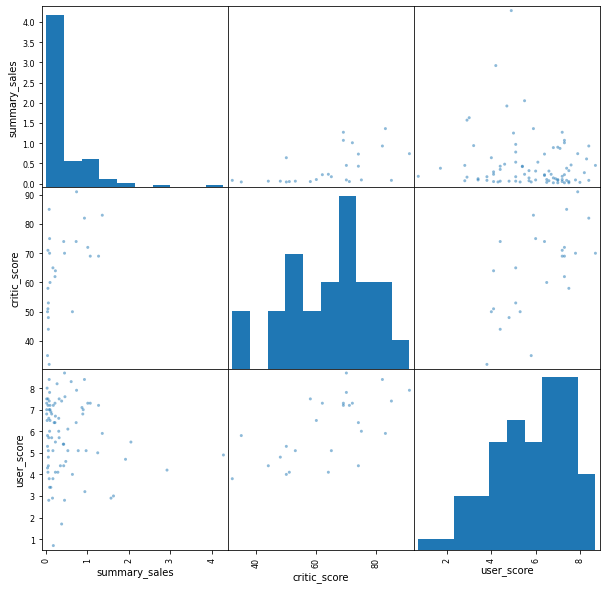

In [54]:
pd.plotting.scatter_matrix(X360_sales_crit_and_user_ratings, figsize=(10, 10))

In [55]:
_3DS_sales_crit_and_user_ratings = _3DS_actual_data_games_sales.loc[:,['summary_sales', 'critic_score', 'user_score']]
_3DS_sales_crit_and_user_ratings.head()

,summary_sales,critic_score,user_score
47,11.68,NaN,NaN
96,7.55,NaN,NaN
108,7.14,NaN,NaN
312,3.89,86.0,8.7
406,3.32,NaN,NaN


In [56]:
_3DS_sales_crit_and_user_ratings.corr()

,summary_sales,critic_score,user_score
summary_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


array([[<AxesSubplot:xlabel='summary_sales', ylabel='summary_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='summary_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='summary_sales'>],
       [<AxesSubplot:xlabel='summary_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='summary_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

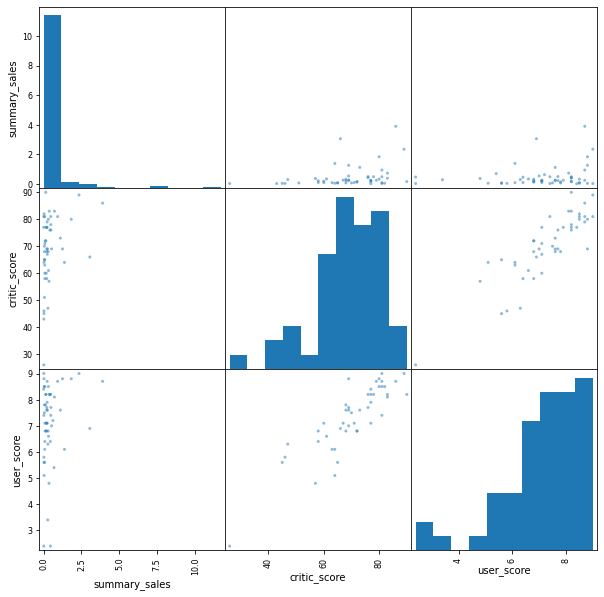

In [57]:
pd.plotting.scatter_matrix(_3DS_sales_crit_and_user_ratings, figsize=(10, 10))

Соотнесем выводы с продажами игр на других платформах. Платформы PS3, PS4 и X360 имеют похожие связи, как и у XOne.

Можно отдельно выделить 3DS, чьи продажи зависят напрямую, хоть и не сильно от рейтинга игроков. Возможно здесь идет лучше работа по составлению рейтинга для игр и системы отзывов для игроков.

Let's compare the findings with sales of games on other platforms. The PS3, PS4, and X360 platforms share similar ties to the XOne.

We can single out 3DS separately, whose sales depend directly, although not much, on the rating of players. Perhaps there is a better job being done here on the ratings for the games and the feedback system for the players.

In [58]:
genre_pivot_table = pd.pivot_table(actual_data_games_sales, index='genre', values='summary_sales', aggfunc='sum')
genre_pivot_table.sort_values('summary_sales', ascending=False)

,summary_sales
genre,
action,199.36
shooter,170.94
sports,109.48
role-playing,101.44
misc,37.55
fighting,28.22
racing,27.52
platform,18.09
adventure,17.55


Text(0, 0.5, 'Глобальные продажи')

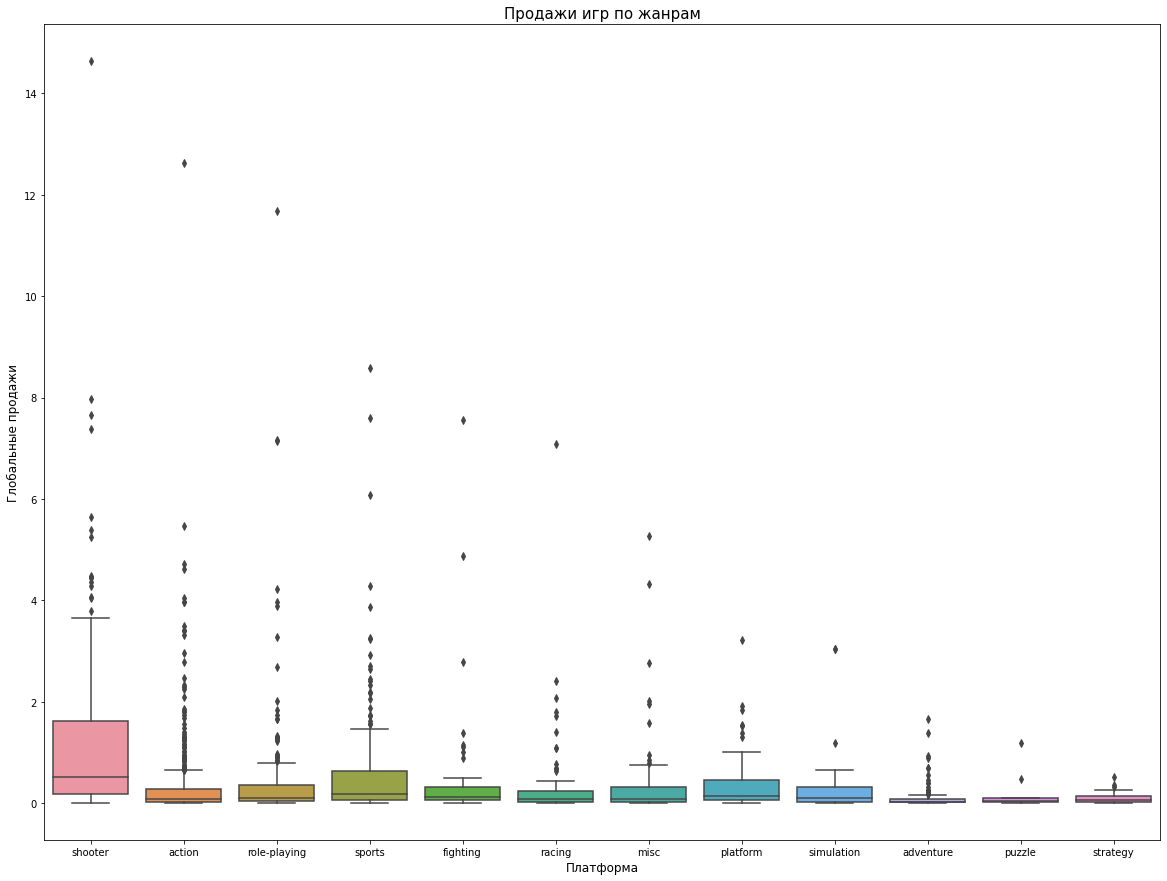

In [59]:
plt.figure(figsize=(20,15))
sns.boxplot(data=actual_data_games_sales, x='genre', y='summary_sales')
plt.title('Продажи игр по жанрам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

(0.0, 4.0)

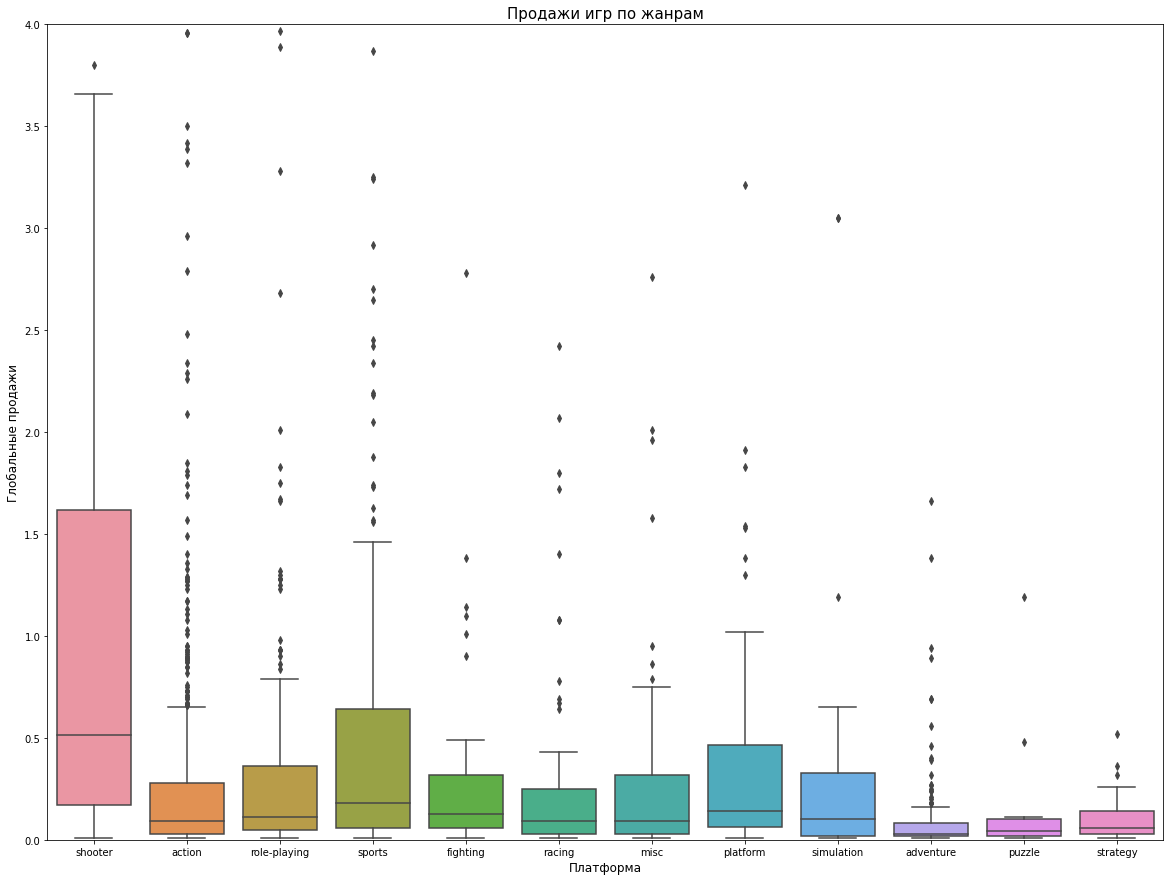

In [60]:
plt.figure(figsize=(20,15))
sns.boxplot(data=actual_data_games_sales, x='genre', y='summary_sales')
plt.title('Продажи игр по жанрам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0,4)

Посмотрим на общее распределение игр по жанрам в контексте прибыльности. Самыми прибыльными жанрами можно считать экшен (Action), шутеры (Shooter), спортивные игры (Sports) и ролевые игры (Role-Playing).

На период 2013-2016 год не пользуются популярностью приключения (Adventure), симуляторы (Simulation) стратегии реального времени или пошаговые (Strategy) и головоломки (Puzzle).

Вероятно, в настоящее время игроки больше хотят захватывающих действий, поэтому головоломки не столь популярны. Приключение и симуляторы имеют похожую тенденцию. Стратегии также крайне непопулярны, вероятно ввиду большой трудности освоения и иногда неторопливости игрового процесса.

________________________________________________________________________________________________________________________________

Let's look at the overall distribution of games by genre in the context of profitability. The most profitable genres can be considered action (Action), shooters (Shooter), sports games (Sports) and role-playing games (Role-Playing).

For the period 2013-2016, adventures (Adventure), simulators (Simulation), real-time strategies or turn-based (Strategy) and puzzles (Puzzle) are not popular.

Probably, nowadays players want more exciting action, so puzzles are not so popular. Adventure and simulation have a similar trend. Strategies are also extremely unpopular, probably due to the great difficulty in mastering and sometimes the slowness of the gameplay.

### Составление портрета пользователя каждого региона

### Drawing up a portrait of the user of each region

In [61]:
#Напишем функции для создания сводных таблиц и отсривоки барплотов

#Функция для создания сводбных таблиц за весь период
def forpivot(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = data.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n') 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

plt.show()
sns.set()

#Функция для создания сводных таблиц за последний год
def for_pivot_actual(row, title):
    temp = actual_data_games_sales
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n')
        sns.set_palette("BuGn_r")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)

#### Портрет американского пользователя

#### Portrait of an American user

  platform  na_sales
0     x360    595.74
1      ps2    572.92
2      wii    486.87
3      ps3    390.13
4       ds    380.31



      genre  na_sales
0    action    863.17
1    sports    671.20
2   shooter    584.83
3  platform    444.44
4      misc    399.57



  rating  na_sales
0      e   1972.25
1      t   1154.93
2      m    863.39
3   e10+    345.50
4    k-a      2.56





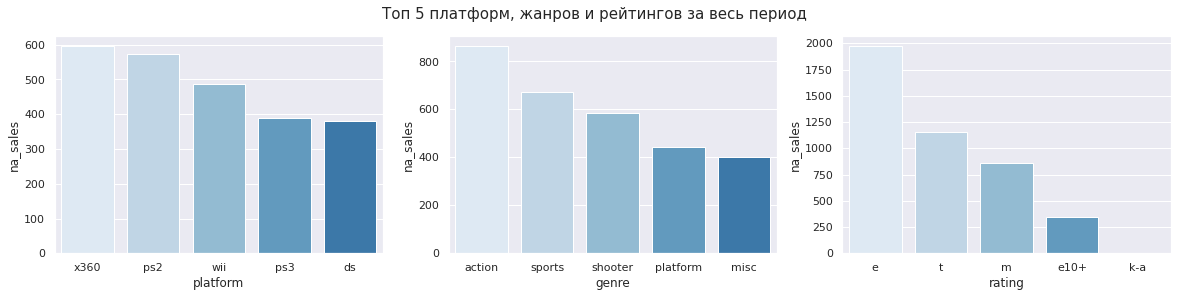

In [62]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период
forpivot('na_sales','Топ 5 платформ, жанров и рейтингов за весь период')

  platform  na_sales
0      ps4     98.61
1     xone     81.27
2     x360     28.30
3      3ds     22.64
4      ps3     22.05



          genre  na_sales
0       shooter     79.02
1        action     72.53
2        sports     46.13
3  role-playing     33.47
4          misc     15.05



  rating  na_sales
0      m    115.23
1      t     73.41
2      e     62.19
3   e10+     33.23





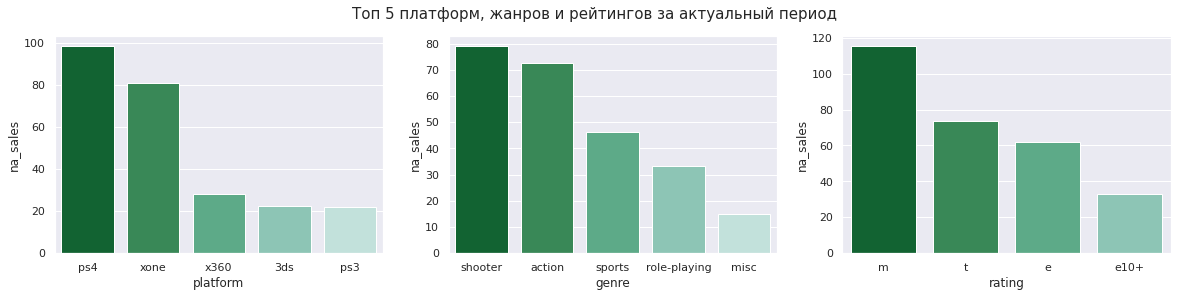

In [63]:
#Выведем топ 5 платформ, жанров и рейтингов за актуальный период
for_pivot_actual('na_sales','Топ 5 платформ, жанров и рейтингов за актуальный период')

Вывод:

Самые популярные игровые платформы в северной америке за все время это: X360, PS2, WII, PS3, DS
Топ 5 жанров в северной америке за все время: action, sports, shooter, platform, misc
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

Если посмотреть с 2014 по 2016 годы, то мы видим как интерес кардинально меняется:
Топ игровых приставок выглядит таким образом : PS4, Xone, X360, 3DS, PS3
Топ жанров игр: Shooter, Action, Sports, Role-playing, Misc
Топ рейтингов игр : "От 17 и выше" , "от 13 и выше" и "для всех"


________________________________________________________________________________________________________________________________

Conclusion:

The most popular gaming platforms in North America of all time are: X360, PS2, WII, PS3, DS
Top 5 genres in North America of all time: action, sports, shooter, platform, misc
The ratings show that games with a rating of "everyone" have the most sales of all time, games with a rating of "13 and above" are in second place, and games with a rating of "17 and above" are in third place.

If you look from 2014 to 2016, we see how interest changes dramatically:
Top game consoles look like this: PS4, Xone, X360, 3DS, PS3
Top game genres: Shooter, Action, Sports, Role-playing, Misc
Top Game Ratings : "17 and up", "13 and up" and "for everyone"

#### Портрет европейского пользователя

#### Portrait of a European user

  platform  eu_sales
0      ps2    332.63
1      ps3    327.21
2     x360    268.32
3      wii    258.32
4       ps    212.39



     genre  eu_sales
0   action    510.99
1   sports    371.33
2  shooter    314.52
3   racing    234.49
4     misc    210.60



  rating  eu_sales
0      e   1062.12
1      t    628.68
2      m    524.51
3   e10+    183.35
4     ao      0.61





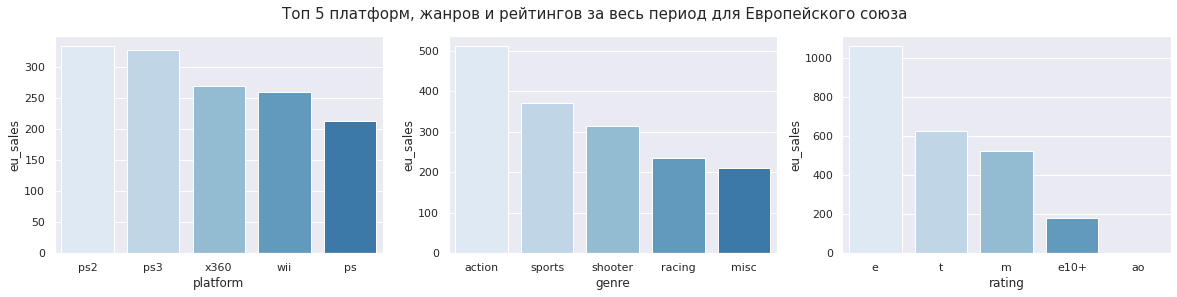

In [64]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период для Европейского союза
forpivot('eu_sales','Топ 5 платформ, жанров и рейтингов за весь период для Европейского союза')

  platform  eu_sales
0      ps4    130.04
1     xone     46.25
2      ps3     25.54
3       pc     17.97
4      3ds     16.12



          genre  eu_sales
0        action     74.68
1       shooter     65.52
2        sports     45.73
3  role-playing     28.17
4        racing     14.13



  rating  eu_sales
0      m    109.53
1      e     74.44
2      t     60.55
3   e10+     26.16





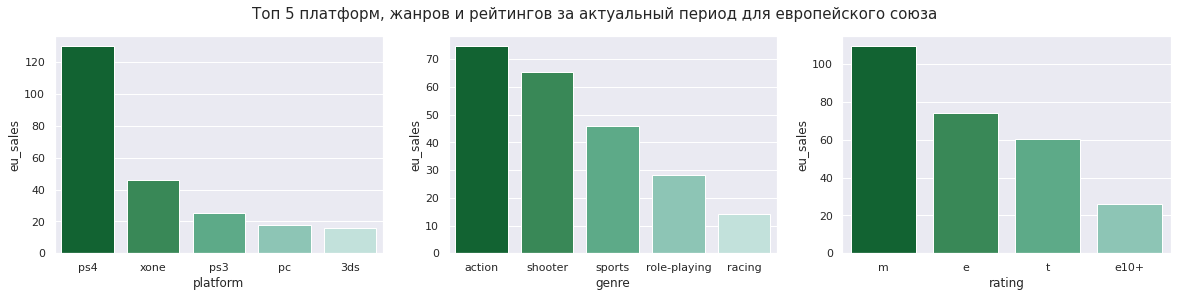

In [65]:
#Выведем топ 5 платформ, жанров и рейтингов за актуальный период для европейского союза
for_pivot_actual('eu_sales','Топ 5 платформ, жанров и рейтингов за актуальный период для европейского союза')

Вывод:

Самые популярные игровые платформы в Европе это: PS2, PS3, X360, WII, PS
Топ 5 жанров в Европе : action, sports, shooter, racing, misc
По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"

За актуальный период интерес у пользователя кардинально изменился:
Топ жанров стал:  action, shooter, sports, role-playing, racing
Топ платформ: PS4, Xone, PS3, PC, 3DS
Топ рейтингов: "От 17 и выше" , "Для всех" и "от 13 и выше"

________________________________________________________________________________________________________________________________

Conclusion:

The most popular gaming platforms in Europe are: PS2, PS3, X360, WII, PS
Top 5 genres in Europe : action, sports, shooter, racing, misc
The ratings show that games with a rating of "for everyone" have the most sales, games with a rating of "17 and above" are in second place, and games with a rating of "13 and above" are in third place.

Over the current period, the interest of the user has changed dramatically:
Top genres became: action, shooter, sports, role-playing, racing
Top platforms: PS4, Xone, PS3, PC, 3DS
Top ratings: "Ages 17 and up", "For everyone" and "Ages 13 and up"

#### Портрет японского пользователя

#### Portrait of a Japanese user

  platform  jp_sales
0       ds    175.02
1       ps    139.78
2      ps2    137.54
3     snes    116.55
4      3ds    100.62



          genre  jp_sales
0  role-playing    353.39
1        action    160.14
2        sports    134.93
3      platform    130.71
4          misc    107.02



  rating  jp_sales
0      e    603.61
1      t    562.20
2      m     83.17
3   e10+     40.20
4    k-a      1.46





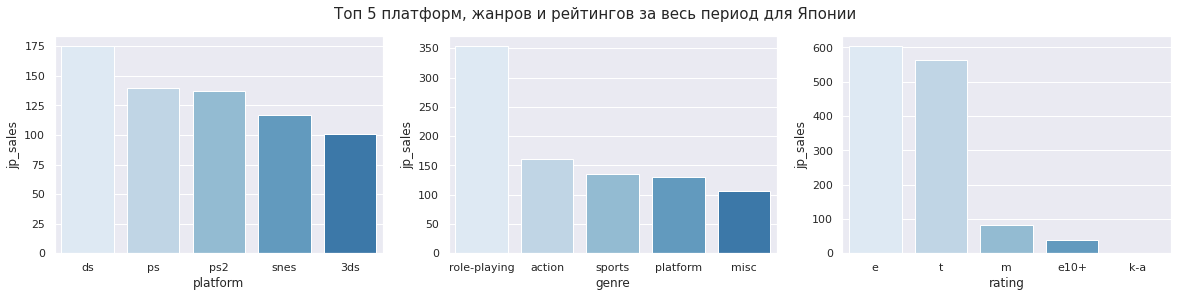

In [66]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период для Японии
forpivot('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период для Японии')

  platform  jp_sales
0      3ds     44.24
1      ps4     15.02
2      psv     14.54
3      ps3     11.22
4     wiiu      7.31



          genre  jp_sales
0  role-playing     31.16
1        action     29.58
2      fighting      6.37
3          misc      5.61
4       shooter      4.87



  rating  jp_sales
0      t     60.45
1      e     19.47
2      m      8.71
3   e10+      4.46





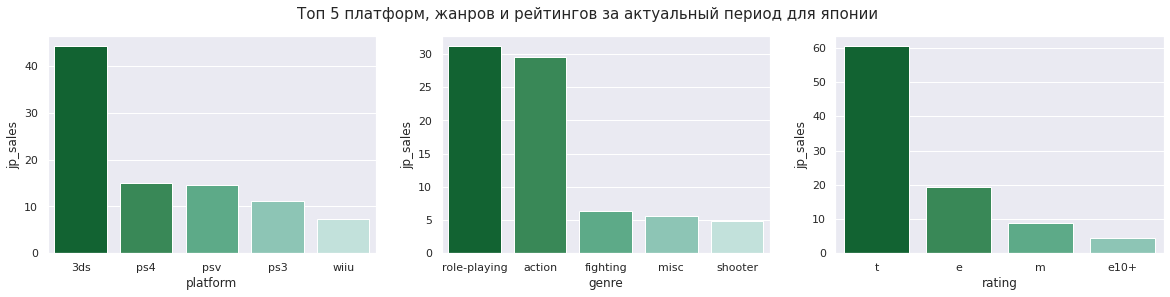

In [67]:
#Выведем топ 5 платформ, жанров и рейтингов за актуальный период для японии
for_pivot_actual('jp_sales','Топ 5 платформ, жанров и рейтингов за актуальный период для японии')

Вывод:

Самые популярные игровые платформы в Японии это: 3DS, PS4, PSV, PS3, WIIU
Топ 5 жанров в Японии : Role-Playing, action, fighting, misc, shooter
По рейтингам видно, что больше всего продаж у игр с рейтингом "от 13 и выше", на втором месте игры с рейтингом "для всех" и на третьем месте игры с рейтингом "от 17 и выше"

За пактуальный период интерес у пользователя несколько изменился
Топ Жанров: role-playing, action, fighting, misc, shooter
топ платформ: 3DS, PS4, PSV, PS3, WIIU
топ рейтингов: "от 13 и выше", "от 17 и выше" и "для всех

________________________________________________________________________________________________________________________________

Conclusion:

The most popular gaming platforms in Japan are: 3DS, PS4, PSV, PS3, WIIU
Top 5 genres in Japan : Role-Playing, action, fighting, misc, shooter
The ratings show that games with a rating of "13 and above" have the most sales, games with a rating of "for everyone" are in second place, and games with a rating of "17 and above" are in third place.

During the pactual period, the user's interest has changed somewhat
Top Genres: role-playing, action, fighting, misc, shooter
top platforms: 3DS, PS4, PSV, PS3, WIIU
top ratings: "from 13 and above", "from 17 and above" and "for all

#### Вывод по составлению портрета пользователя в целом

#### Conclusion on drawing up a portrait of the user as a whole

Для прогноза будущих продаж лучше брать данные за актуальный период, так как технологии в данной сфере меняются очень быстрыми темпами, и вкусы людей также могут меняться крайне быстро. Соответственно, если обобщать, для 2017 года большую часть прибыли будут приносить игры жанра Action, для платформы PS4 и с рейтингом от 13 и выше

To predict future sales, it is better to take data for the current period, since technologies in this area are changing at a very fast pace, and people's tastes can also change extremely quickly. Accordingly, to summarize, for 2017, most of the profits will come from Action games for the PS4 platform and with a rating of 13 or higher.

### Проверка гипотез

### Hypothesis testing

In [68]:
def stat_info(serie, bins=0):
    serie_description = serie.describe()
    mean = serie_description[1]
    std = serie_description[2]
    d_min = serie_description[3]
    q1 = serie_description[4]
    median = serie_description[5]
    q3 = serie_description[6]
    d_max = serie_description[7]
    left_border = d_min
    right_border = d_max
    if bins == 0:
        bins = right_border - left_border
        if bins>100:
            bins = 100
        elif bins < 1:
            bins = abs(bins*10)+1
        bins = int(bins)
    else:
        bins = bins
    serie.hist(bins=bins, range=(left_border, right_border))
    print(serie_description)
    variance_estimate = np.var(serie, ddof=1)
    standart_dev = np.std(serie, ddof=1)
    print('Среднее значение: {:.2f}'.format(mean))
    print('Дисперсия: {:.2f}'.format(variance_estimate))
    print('Стандартное отклонение: {:.2f}'.format(standart_dev))
    return [mean, variance_estimate, standart_dev]

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64
Среднее значение: 6.59
Дисперсия: 1.89
Стандартное отклонение: 1.38


[6.594545454545456, 1.8910066518847013, 1.375138775500386]

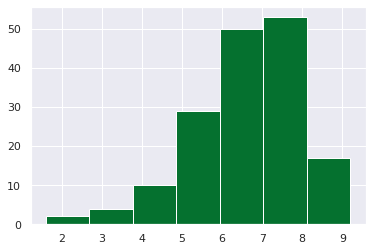

In [69]:
user_rating_XOne = actual_data_games_sales.query('platform == "xone"')['user_score'].dropna()
stat_info(user_rating_XOne)

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64
Среднее значение: 6.30
Дисперсия: 2.90
Стандартное отклонение: 1.70


[6.298360655737705, 2.901154315133451, 1.7032775214666138]

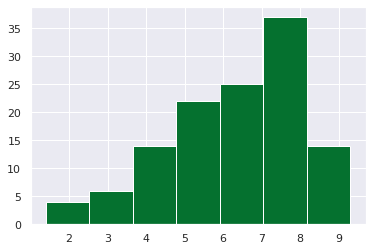

In [70]:
user_rating_PC = actual_data_games_sales.query('platform == "pc"')['user_score'].dropna()
stat_info(user_rating_PC)

Нулевая гипотеза первой гипотезы гласит: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Альтернативная гипотеза гласит: "Средние пользовательские рейтинги платформ Xbox One и PC различаются".

Для оценки гипотезы будем применять тест Стюдента. Соотвественно, мы можем получить два ответа "Отвергаем нулевую гипотезу" и "Не получилось отвергнуть нулевую гипотезу".

При получении ответа "Отвергаем нулевую гипотезу" это будет говорить о том, что гипотеза противоречит эмпирическим данным и скорей всего наше предположение неверно. Значит данные различаются.

При получении ответа "Не получилось отвергнуть нулевую гипотезу", это значит что предположение о равенстве среднего рейтинга верно.

________________________________________________________________________________________________________________________________

The null hypothesis of the first hypothesis states: "The average user ratings of the Xbox One and PC platforms are the same."

The alternative hypothesis states: "The average user ratings of the Xbox One and PC platforms are different."

To evaluate the hypothesis, we will use the Student's test. Accordingly, we can get two answers "Reject the null hypothesis" and "Failed to reject the null hypothesis".

When receiving the answer "We reject the null hypothesis", this will indicate that the hypothesis contradicts the empirical data and most likely our assumption is wrong. So the data is different.

If you receive the answer "Failed to reject the null hypothesis", this means that the assumption about the equality of the average rating is true.

In [71]:
alpha = .01

results = st.ttest_ind(user_rating_XOne, user_rating_PC)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Вывод: Значение p-value равно приблизительно 10%. То есть, с вероятностью в 10% можно случайно получить различность рейтингов двух платформ. Это слишком большая вероятность, чтобы делать вывод о значимом различии между рейтингами платформ. Таким образом, не получилось опровергнуть Нулевую гипотезу.

Conclusion: The p-value is approximately 10%. That is, with a probability of 10%, you can accidentally get a difference in the ratings of the two platforms. This is too high a probability to conclude that there is a significant difference between the ratings of the platforms. Thus, it was not possible to disprove the Null hypothesis.

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64
Среднее значение: 6.76
Дисперсия: 1.90
Стандартное отклонение: 1.38


[6.760606060606061, 1.8984766584766581, 1.3778521903588419]

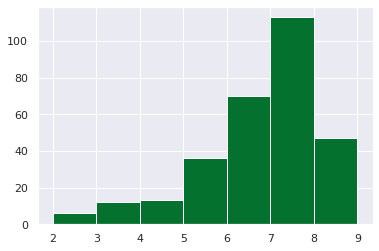

In [73]:
user_rating_Action = actual_data_games_sales.query('genre == "action"')['user_score'].dropna()
stat_info(user_rating_Action)

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64
Среднее значение: 5.23
Дисперсия: 3.45
Стандартное отклонение: 1.86


[5.2251968503937, 3.446979127609048, 1.8566041925001269]

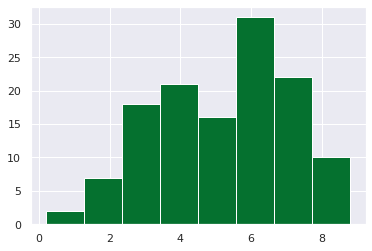

In [74]:
user_rating_Sports = actual_data_games_sales.query('genre == "sports"')['user_score'].dropna()
stat_info(user_rating_Sports)

Нулевая гипотеза первой гипотезы гласит: "Средние пользовательские рейтинги жанров Action и Sports одинаковые".

Альтернативная гипотеза гласит: "Средние пользовательские рейтинги жанров Action и Sports различаются".

Для оценки гипотезы будем применять тест Стюдента. Соотвественно, мы можем получить два ответа "Отвергаем нулевую гипотезу" и "Не получилось отвергнуть нулевую гипотезу".

При получении ответа "Отвергаем нулевую гипотезу" это будет говорить о том, что гипотеза противоречит эмпирическим данным и скорей всего наше предположение неверно. Значит данные различаются.

При получении ответа "Не получилось отвергнуть нулевую гипотезу", это значит что предположение о равенстве среднего рейтинга верно.

________________________________________________________________________________________________________________________________

The null hypothesis of the first hypothesis states: "The average user ratings of the Action and Sports genres are the same."

The alternative hypothesis states: "Average user ratings for the Action and Sports genres are different."

To evaluate the hypothesis, we will use the Student's test. Accordingly, we can get two answers "Reject the null hypothesis" and "Failed to reject the null hypothesis".

When receiving the answer "We reject the null hypothesis", this will indicate that the hypothesis contradicts the empirical data and most likely our assumption is wrong. So the data is different.

If you receive the answer "Failed to reject the null hypothesis", this means that the assumption about the equality of the average rating is true.

In [75]:
alpha = .01

results = st.ttest_ind(user_rating_Action, user_rating_Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Вывод: между выбранными жанрами существуют статистически значимые различия.

Conclusion: there are statistically significant differences between the selected genres.

### Общий вывод

### General conclusion

В ходе проделанной работы было выполнено:

Просмотрена таблица, выявлены аномалии и пропущенные значения.
Проведена предобработка таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
Проведен анализ по данным и подготовлены актуальные данные.
Составлены портреты пользователей для купных регионов продаж.
Выполнены проверки гипотез. 

Существующие технические возможности во многом определяют возможности разработчиков. Жизненный цикл в 5-7 лет обусловлен, вероятно, прорывами в технологиях процессора, оперативной и видеопамяти.

В целом на актуальный период наиболее популярны игровые приставки, PC явно теряет позиции среди игроков. Платформа X360 продолжает сохранять пользователей, успешно соревнуясь с новой платформой PS4, которая показывает наибольший рост прибыли за последние годы. 

Поведение пользователей.
Американский игрок - от 17 лет, любит играть или на PS4, или на XOne, любит игры на реакцию и шутеры. Европейский игрок - от 17 лет, любит играть на PS4, любит игры на реакцию и шутеры. Японский игрок - от 13 лет, любит играть на переносных платформах 3DS или PSV, любит тратить время на RPG и экшены.

Жанр - это то, что выбирает игрок. Каждый человек уникален, и не каждому игроку будет по душе одновременно стратегия и шутеры. Соответсвенно студии-разработчики и издатели боряться за целевую аудиторию своего продукта.

По итогам анализа можно выработать определенные рекомендации на 2017 год:

1. Делать ставку на современные платформы. Покупать вышедшие и новые игры на PS4, XOne и 3DS.
2. Выставлять на прилавки популярные жанры - экшен, шутеры, спортивные и ролевые игры.
3. Следить за своей аудиторией. В основом большинство игр рассчитано на игроков, которым 17 лет и старше.
4. Не забывать распространять компьютерные игры и портации игр с популярных платформ на PC. Компьютер еще долго не выйдет из конкуренции за игроков, вероятно из-за возможностей к модернизации.

________________________________________________________________________________________________________________________________

In the course of the work done, the following was accomplished:

The table was reviewed, anomalies and missing values were identified.
The table was pre-processed: replacing columns, filling in gaps, removing duplicates, etc.
An analysis was carried out according to the data and actual data was prepared.
Compiled user portraits for large sales regions.
Hypotheses were tested.

Existing technical capabilities largely determine the capabilities of developers. The life cycle of 5-7 years is probably due to breakthroughs in processor technology, RAM and video memory.

In general, game consoles are the most popular for the current period, the PC is clearly losing ground among the players. The X360 platform continues to retain users, successfully competing with the new PS4 platform, which has shown the largest revenue growth in recent years.

User behavior.
American player - 17+, likes to play on either PS4 or XOne, likes reaction games and shooters. European player - 17+, loves to play on PS4, likes reaction games and shooters. Japanese player - 13+, loves to play on portable 3DS or PSV platforms, loves to spend time on RPGs and action games.

Genre is what the player chooses. Each person is unique, and not every player will like strategy and shooters at the same time. Accordingly, developer studios and publishers fight for the target audience of their product.

Based on the results of the analysis, it is possible to develop certain recommendations for 2017:

1. Bet on modern platforms. Buy released and new games on PS4, XOne and 3DS.
2. Put on the shelves popular genres - action, shooters, sports and role-playing games.
3. Follow your audience. Basically, most of the games are designed for players who are 17 years old and older.
4. Do not forget to distribute computer games and porting games from popular platforms to PC. The computer will not leave the competition for players for a long time, probably because of the possibilities for modernization.

## Иное представление данных

## Different representation of data

In [76]:
data_games = pd.read_csv('/datasets/games.csv')

In [77]:
data_games.columns = map(str.lower, data_games.columns)

In [78]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [79]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [80]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [81]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [82]:
# check
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, labels = sales.platform,
               
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    plt.tight_layout()

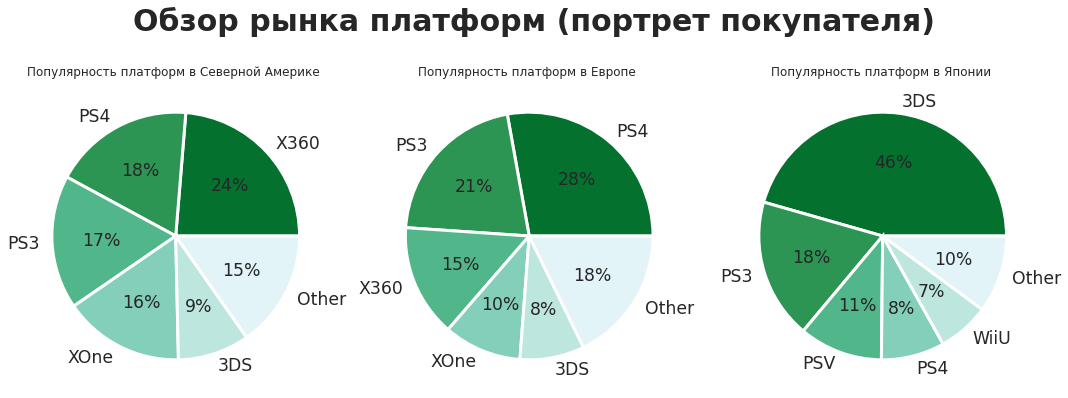

In [83]:
# check
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

x_year = 2012

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

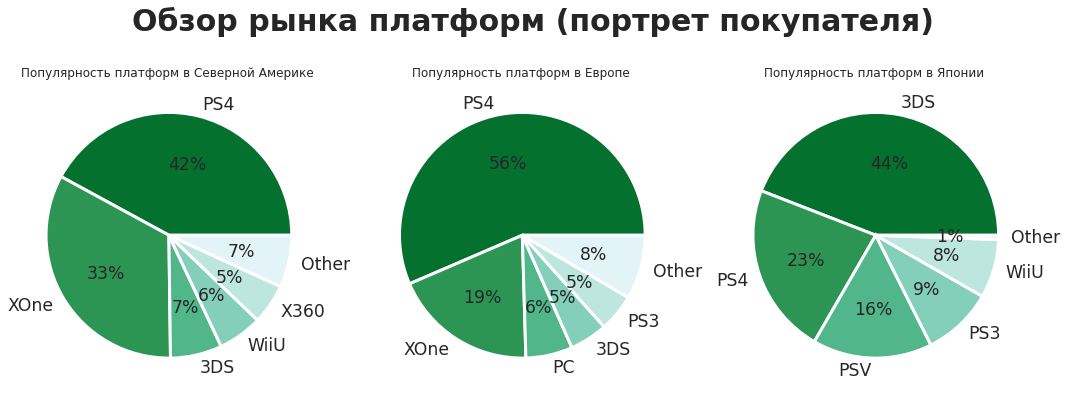

In [84]:
# check
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

x_year = 2015

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])